In [13]:
import os
import numpy as np
from tqdm import tqdm
import cv2

from totalface_cpu.model_zoo.get_models import get_detection_model
from totalface_cpu.face.get_result import get_detection
from totalface_cpu.data.image import read_image
from totalface_cpu.utils.util_warp import face_align
from totalface_cpu.data.constant import LMARK_REF_ARC

import matplotlib.pyplot as plt

In [2]:
dt_name = 'scrfd'
dt_path = "scrfd_10g_bnkps.onnx"

detection_model = get_detection_model(dt_name,dt_path,load_multi=False)

providers: ['CPUExecutionProvider']
scrfd onnx loaded


In [4]:
path = "FaceInTheWild/Validation/image_list_org_1_80x60_new_unmask.txt"
lines = open(path,'r').readlines()

In [10]:
ori_sub,_,w,h,id_val,age,gender,mask_flag,bbox_str,lb_str = lines[0].strip().split(",")

ori_base = "/data/"
ori_path = "/"+os.path.join(ori_base,ori_sub)

img = read_image(ori_path)

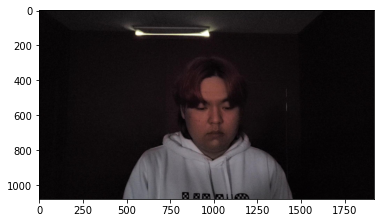

In [14]:
plt.imshow(img)

In [45]:
faces = get_detection(dt_name,detection_model,img,thresh=0.5,height_min=0,input_size=(640,640))

face = faces[0]

In [70]:
imgsize=256
scale = imgsize/112

ori_size=112
new_size=256
add_size=(new_size-ori_size)//2

LMARK_REF_ARC_new = LMARK_REF_ARC+[add_size,add_size]

In [71]:
aimg = face_align(img,LMARK_REF_ARC_new,face['land5'],out_size=new_size)

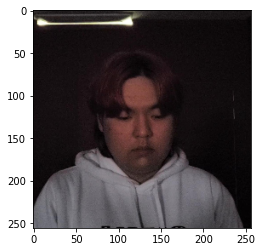

In [72]:
plt.imshow(aimg)